In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [2]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
image_file = get_pkg_data_filename(r"/home/ambica/Desktop/Project/img1.fits")

In [3]:
fits.info(image_file)

Filename: /home/ambica/Desktop/Project/img1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    4325   (30720, 12800)   float32   


In [4]:
image_data=fits.getdata(image_file,ext=0)
#Get data from Primary HDU

In [9]:
hdulist=fits.open(r"/home/ambica/Desktop/Project/img1.fits")
#hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                30720                                                  
NAXIS2  =                12800                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NEXTEND =                    1 / Number of standard extensions                  
FILENAME= 'uds-f125w-astrodrizzle-v4.0_drz_sci.fits' / name of file             
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '          

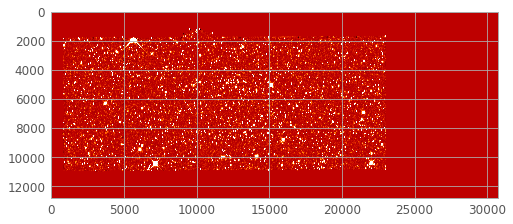

In [5]:
from astropy.visualization import ZScaleInterval
z=ZScaleInterval()
z1,z2=z.get_limits(image_data)
plt.figure()
plt.imshow(image_data,vmin=z1,vmax=z2)

In [6]:
from astropy.nddata import Cutout2D
from astropy import units as u
zoomSize = u.Quantity((10,10), u.arcsec)
from astropy import wcs
from astropy.io import fits
fname=r"/home/ambica/Desktop/Project/img1.fits"
hdulist = fits.open(fname)
w = wcs.WCS(hdulist[0].header)
data=fits.getdata(fname,ext=0)
from astropy.coordinates import SkyCoord
position = SkyCoord(34.3933, -5.22632, unit="deg")
cutout = Cutout2D(data, position, zoomSize, wcs=w)
xdu = fits.PrimaryHDU(cutout.data)
xdu.header = hdulist[0].header
xdu.header.update(cutout.wcs.to_header())
xdu.writeto(r'/home/ambica/Desktop/Project/out1.fits',overwrite=True)

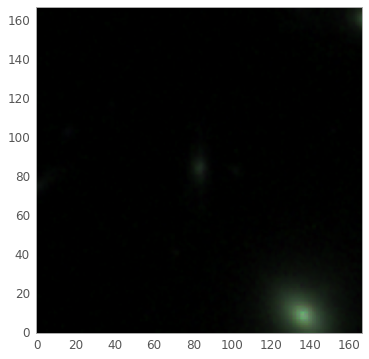

In [16]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
g_name=get_pkg_data_filename('out1.fits')
r_name=get_pkg_data_filename('out2.fits')
i_name=get_pkg_data_filename('out.fits')
g = fits.open(g_name)[0].data
r = fits.open(r_name)[0].data
i = fits.open(i_name)[0].data
rgb=make_lupton_rgb(i,r,g,Q=10, stretch=2,filename="combined.jpeg")
plt.imshow(rgb, origin='lower')
plt.grid(False)